# Working with functions


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Learning Objectives:</h2>
</div>


<div class="panel-body">

<ul>
<li>Define a function that takes parameters.</li>
<li>Return a value from a function.</li>
<li>Test and debug a function.</li>
<li>Set default values for function parameters.</li>
<li>Explain why we should divide programs into small, single-purpose
  functions.</li>
</ul>

</div>

</section>


At this point, we've written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn't want to generate a  figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We'd like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called 'functions' - a shorthand way of re-executing longer pieces of code.

Let's start by defining a function `kelvin_to_celsius` that converts temperatures from Kelvin to Celsius:

In [3]:
def kelvin_to_celsius(temp):
    return temp - 273.15 

kelvin_to_celsius(15)

-258.15

The function definition opens with the word `def`, which is followed by the name of the function and a parenthesised list of parameter names. The body of the function - the statements that are executed when it runs - is indented below the definition line, typically by four spaces.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a **return statement** to send a result back to whoever asked for it.

Let's try running our function. Calling our own function is no different from calling any other function:

We've successfully called the function that we defined, and we have access to the value that we returned.


<section class="callout panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span> Integer division</h2>
</div>


<div class="panel-body">

<p>We are using Python 3 division, which always returns a floating point number:</p>
<div class="codehilite"><pre><span></span><span class="k">print</span><span class="p">(</span><span class="mi">5</span><span class="o">/</span><span class="mi">9</span><span class="p">)</span>
</pre></div>


<p>Unfortunately, this wasn't the case in Python 2:</p>
<div class="codehilite"><pre><span></span><span class="err">!</span><span class="n">python2</span> <span class="o">-</span><span class="n">c</span> <span class="s2">&quot;print 5/9&quot;</span>
</pre></div>


<p>If you are using Python 2 and want to keep the fractional part of division you need to convert one or the other number to floating point:</p>
<div class="codehilite"><pre><span></span><span class="nb">float</span><span class="p">(</span><span class="mi">5</span><span class="p">)</span> <span class="o">/</span> <span class="mi">9</span>
</pre></div>


<div class="codehilite"><pre><span></span><span class="mi">5</span> <span class="o">/</span> <span class="nb">float</span><span class="p">(</span><span class="mi">9</span><span class="p">)</span>
</pre></div>


<div class="codehilite"><pre><span></span><span class="mf">5.0</span> <span class="o">/</span> <span class="mi">9</span>
</pre></div>


<div class="codehilite"><pre><span></span><span class="mi">5</span> <span class="o">/</span> <span class="mf">9.0</span>
</pre></div>


<p>And if you want an integer result from division in Python 3, use a double-slash:</p>
<div class="codehilite"><pre><span></span><span class="mi">4</span> <span class="o">//</span> <span class="mi">2</span>
</pre></div>


<div class="codehilite"><pre><span></span><span class="mi">3</span> <span class="o">//</span> <span class="mi">2</span>
</pre></div>

</div>

</section>


## Composing Functions

Now that we've seen how to turn Kelvin into Celsius, let's try converting Celsius to Fahrenheit:

In [10]:
5/7

def celius_to_far(temp):
    return temp*(9/5)+32

celius_to_far(22)

71.6

What about converting Kelvin to Fahrenheit? We could write out the formula, but we don't need to. Instead, we can compose the two functions we have already created:

In [12]:
def kelvin_to_far(temp):
    temp_c= kelvin_to_celsius(temp)
    fhar = celius_to_far(temp_c)
    return fhar

kelvin_to_far(293)

67.73000000000005

This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here - typically half a dozen to a few dozen lines - but they shouldn't ever be much longer than that, or the next person who reads it won't be able to understand what's going on.

## Tidying up

Now that we know how to wrap bits of code up in functions, we can make our inflammation analyasis easier to read and easier to reuse. First, let's make an `analyse` function that generates our plots:

In [42]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

def analyse(filename):
    data = np.loadtxt(filename, delimiter=",")
    fig = plt.figure(figsize=(10,3))
    fig.suptitle(filename)
    
    ax1=fig.add_subplot(1,3,1)
    ax2=fig.add_subplot(1,3,2)
    ax3=fig.add_subplot(1,3,3)
    
    ax1.set_ylabel("average")
    ax1.plot(data.mean(axis=0))
    
    ax2.set_ylabel("min")
    ax2.plot(data.min(axis=0))
    
    ax3.set_ylabel("max")
    ax3.plot(data.max(axis=0))
    
    fig.tight_layout(pad=1.5)
    
    plt.show()
    

and another function called `detect_problems` that checks for those systematics we noticed:

In [43]:
def detect_problems(filename):
    data= np.loadtxt(filename, delimiter=",")
    
    if data.max(axis=0)[0] == 0 and np.max(data, axis=0)[20] == 20:
        print("susssspiciousssssss")
    elif data.min(axis=0).sum() == 0:
        print("oddly suspicious")
    else:
        print("tis okay")
        

Notice that rather than jumbling this code together in one giant `for` loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler `for` loop:

inflammation-01.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


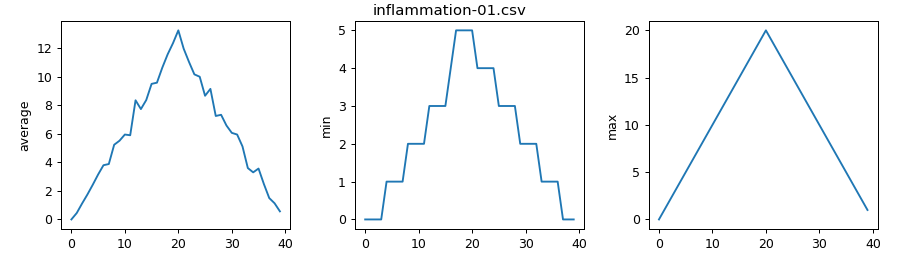

inflammation-02.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


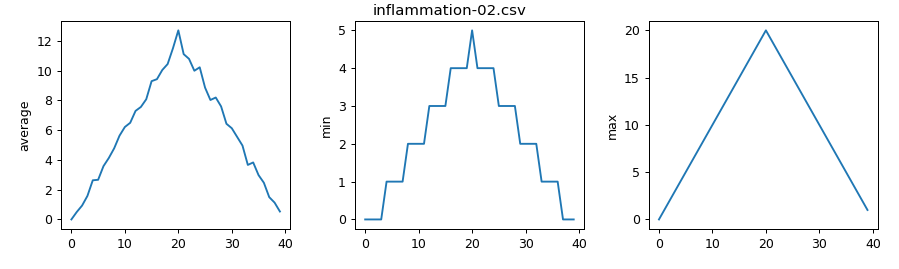

inflammation-03.csv
oddly suspicious


<IPython.core.display.Javascript object>


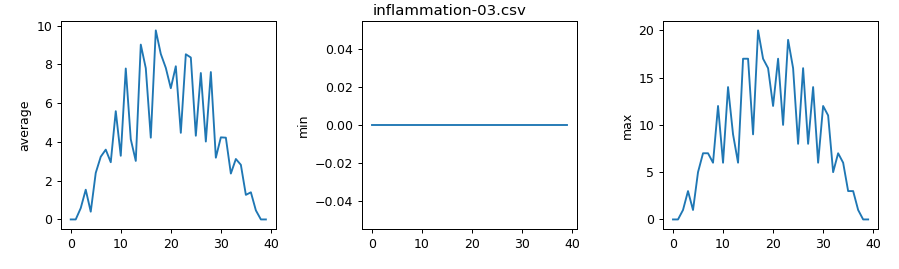

inflammation-04.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


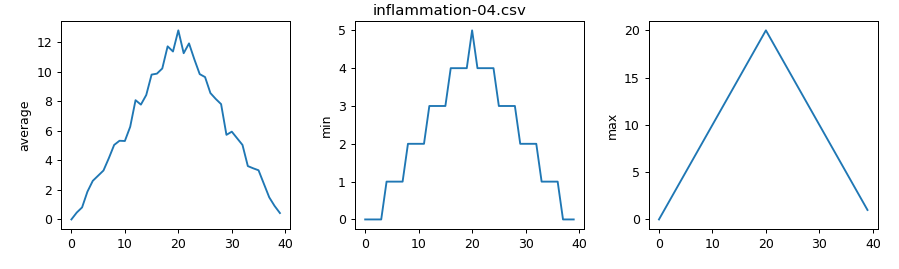

inflammation-05.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


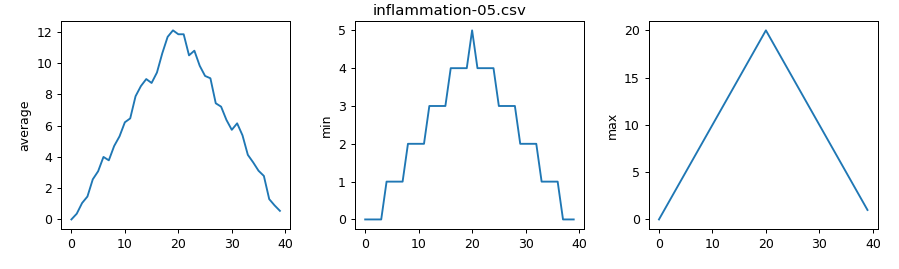

inflammation-06.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


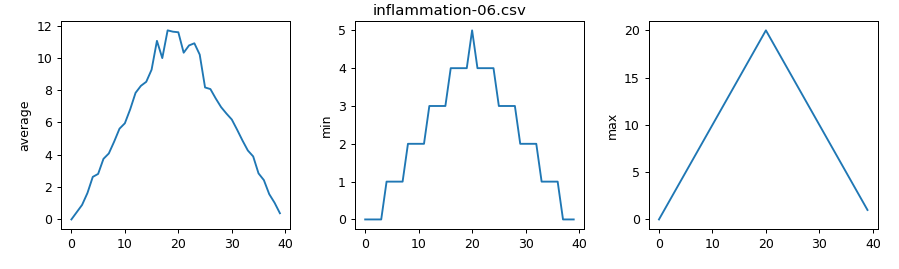

inflammation-07.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


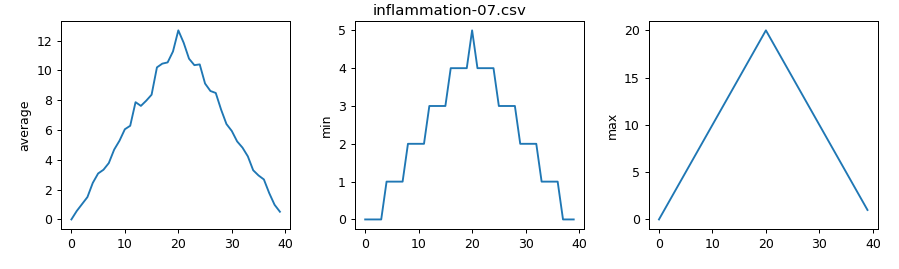

inflammation-08.csv
oddly suspicious


<IPython.core.display.Javascript object>


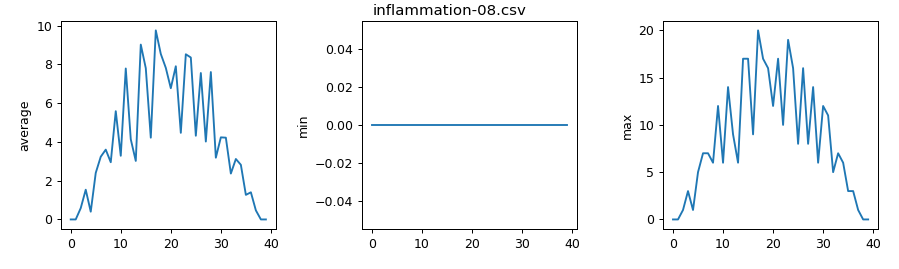

inflammation-09.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


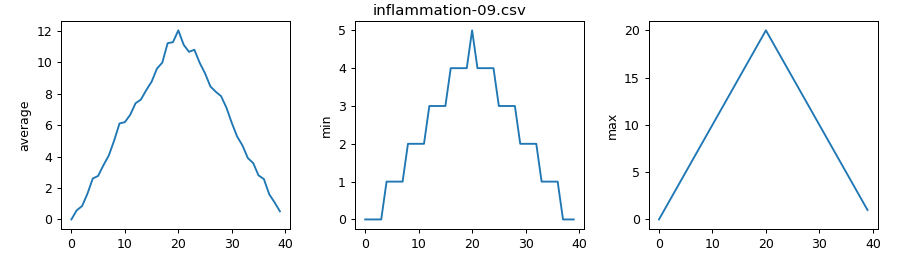

inflammation-10.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


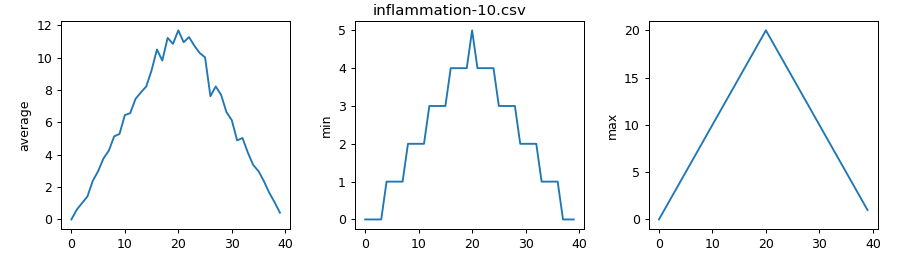

inflammation-11.csv
oddly suspicious


<IPython.core.display.Javascript object>


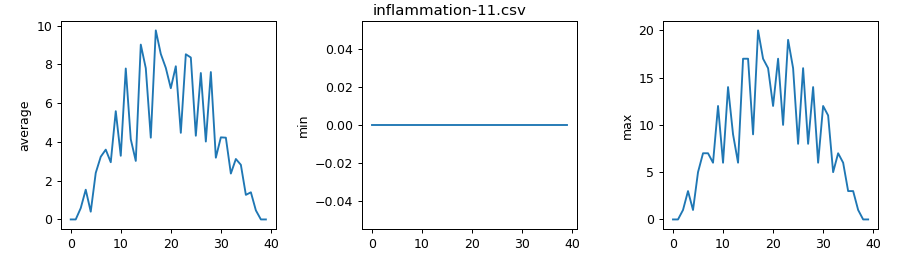

inflammation-12.csv
susssspiciousssssss


<IPython.core.display.Javascript object>


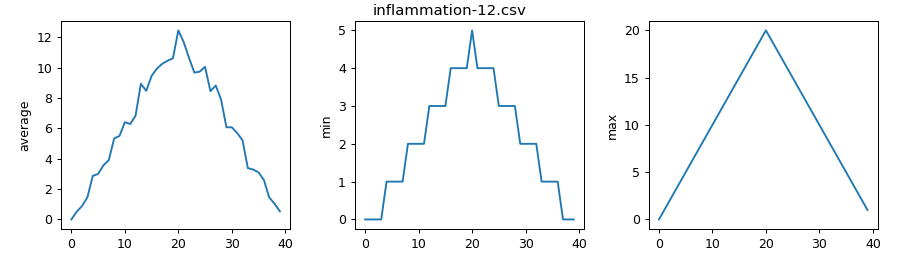

In [44]:
import glob
filenames= glob.glob("inflammation-*.csv")
filenames.sort()
#print(filenames)

for file in filenames:
    print(file)
    detect_problems(file)
    analyse(file)

By giving our functions human-readable names, we can more easily read and understand what is happening in the `for` loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.

## Defining Defaults

We have passed parameters to functions in two ways: directly, as in `type(data)`, and by name, as in `np.loadtxt(fname='something.csv', delimiter=',')`. In fact, we can pass the filename to `loadtxt` without the `fname=`:

In [47]:
data=np.loadtxt("inflammation-01.csv", delimiter=",")

but we still need to say `delimiter=`:

In [48]:
def centre(data, desired=0.0):
    return(data -data.mean()) + desired

To understand what's going on, and make our own functions easier to use, let's re-define our center function like this:

In [49]:
centre(data)

array([[-6.14875, -6.14875, -5.14875, ..., -3.14875, -6.14875, -6.14875],
       [-6.14875, -5.14875, -4.14875, ..., -5.14875, -6.14875, -5.14875],
       [-6.14875, -5.14875, -5.14875, ..., -4.14875, -5.14875, -5.14875],
       ...,
       [-6.14875, -5.14875, -5.14875, ..., -5.14875, -5.14875, -5.14875],
       [-6.14875, -6.14875, -6.14875, ..., -6.14875, -4.14875, -6.14875],
       [-6.14875, -6.14875, -5.14875, ..., -5.14875, -5.14875, -6.14875]])

The key change is that the second parameter is now written `desired=0.0` instead of just `desired`. If we call the function with two arguments, it works as it did before:

But we can also now call it with just one parameter, in which case `desired` is automatically assigned the default value of 0.0:

This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

As this example shows, parameters are matched up from left to right, and any that haven't been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

With that in hand, let's look at the help for numpy.loadtxt:

There's a lot of information here, but the most important part is the first couple of lines:

```python
loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
          unpack=False, ndmin=0)
```

This tells us that loadtxt has one parameter called fname that doesn't have a default value, and eight others that do. If we call the function like this:

then the filename is assigned to `fname` (which is what we want), but the delimiter string `','` is assigned to `dtype` rather than `delimiter`, because `dtype` is the second parameter in the list. However ',' isn't a known `dtype` so our code produced an error message when we tried to run it. When we call `loadtxt` we don't have to provide `fname=` for the filename because it's the first item in the list, but if we want the ',' to be assigned to the variable `delimiter`, we *do* have to provide `delimiter=` for the second parameter since `delimiter` is not the second parameter in the list.


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Combining strings</h2>
</div>


<div class="panel-body">

<p>"Adding" two strings produces their concatenation: <code>'a'</code> + <code>'b'</code> is <code>'ab'</code>. Write a function called <code>fence</code> that takes two parameters called <code>original</code> and <code>wrapper</code> and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:</p>
<div class="codehilite"><pre><span></span><span class="k">print</span><span class="p">(</span><span class="n">fence</span><span class="p">(</span><span class="s1">&#39;name&#39;</span><span class="p">,</span> <span class="s1">&#39;*&#39;</span><span class="p">))</span>

<span class="o">*</span><span class="n">name</span><span class="o">*</span>
</pre></div>

</div>

</section>



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Selecting characters from strings</h2>
</div>


<div class="panel-body">

<p>If the variable <code>s</code> refers to a string, then <code>s[0]</code> is the string's first
character and <code>s[-1]</code> is its last. Write a function called <code>outer</code> that
returns a string made up of just the first and last characters of its
input. A call to your function should look like this:</p>
<div class="codehilite"><pre><span></span><span class="k">print</span><span class="p">(</span><span class="n">outer</span><span class="p">(</span><span class="s1">&#39;helium&#39;</span><span class="p">))</span>

<span class="n">hm</span>
</pre></div>

</div>

</section>



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Rescaling an array</h2>
</div>


<div class="panel-body">

<p>Write a function <code>rescale</code> that takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0. (Hint: If L and H are the lowest and highest values in the original array, then the replacement for a value v should be (v − L)/(H − L).)</p>

</div>

</section>



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Defining defaults</h2>
</div>


<div class="panel-body">

<p>Rewrite the <code>rescale</code> function so that it scales data to lie between 0.0 and 1.0 by default, but will allow the caller to specify lower and upper bounds if they want. Compare your implementation to your neighbor's: do the two functions always behave the same way?</p>

</div>

</section>



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Variables inside and outside functions</h2>
</div>


<div class="panel-body">

<p>What does the following piece of code display when run - and why?</p>
<div class="codehilite"><pre><span></span><span class="n">f</span> <span class="o">=</span> <span class="mi">0</span>
<span class="n">k</span> <span class="o">=</span> <span class="mi">0</span>

<span class="k">def</span> <span class="nf">f2k</span><span class="p">(</span><span class="n">f</span><span class="p">):</span>
  <span class="n">k</span> <span class="o">=</span> <span class="p">((</span><span class="n">f</span><span class="o">-</span><span class="mi">32</span><span class="p">)</span><span class="o">*</span><span class="p">(</span><span class="mf">5.0</span><span class="o">/</span><span class="mf">9.0</span><span class="p">))</span> <span class="o">+</span> <span class="mf">273.15</span>
  <span class="k">return</span> <span class="n">k</span>

<span class="n">f2k</span><span class="p">(</span><span class="mi">8</span><span class="p">)</span>
<span class="n">f2k</span><span class="p">(</span><span class="mi">41</span><span class="p">)</span>
<span class="n">f2k</span><span class="p">(</span><span class="mi">32</span><span class="p">)</span>

<span class="k">print</span><span class="p">(</span><span class="n">k</span><span class="p">)</span>
</pre></div>

</div>

</section>



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> The Old Switcheroo</h2>
</div>


<div class="panel-body">

<p>Consider this code:</p>
<div class="codehilite"><pre><span></span><span class="n">a</span> <span class="o">=</span> <span class="mi">3</span>
<span class="n">b</span> <span class="o">=</span> <span class="mi">7</span>

<span class="k">def</span> <span class="nf">swap</span><span class="p">(</span><span class="n">a</span><span class="p">,</span> <span class="n">b</span><span class="p">):</span>
    <span class="n">temp</span> <span class="o">=</span> <span class="n">a</span>
    <span class="n">a</span> <span class="o">=</span> <span class="n">b</span>
    <span class="n">b</span> <span class="o">=</span> <span class="n">temp</span>

<span class="n">swap</span><span class="p">(</span><span class="n">a</span><span class="p">,</span> <span class="n">b</span><span class="p">)</span>

<span class="k">print</span><span class="p">(</span><span class="n">a</span><span class="p">,</span> <span class="n">b</span><span class="p">)</span>
</pre></div>


<p>Which of the following would be printed if you were to run this code? Why did you pick this answer?</p>
<ul>
<li><code>7 3</code></li>
<li><code>3 7</code></li>
<li><code>3 3</code></li>
<li><code>7 7</code></li>
</ul>

</div>

</section>



<section class="solution panel panel-primary">
<div class="panel-heading">
<h2><span class="fa fa-eye"></span> Solution</h2>
</div>


<div class="panel-body">

<p><code>3, 7</code> is correct. Initially <code>a</code> has a value of 3 and <code>b</code> has a value of 7. When the <code>swap</code> function is called, it creates local variables (also called <code>a</code> and <code>b</code> in this case) and trades their values. The function does not return any values and does not alter <code>a</code> or <code>b</code> outside of its local copy. Therefore the original values of <code>a</code> and <code>b</code> remain unchanged.</p>

</div>

</section>



<section class="keypoints panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-exclamation-circle"></span> Key Points</h2>
</div>


<div class="panel-body">

<ul>
<li>Define a function using <code>def function_name(parameter)</code>.</li>
<li>The body of a function must be indented.</li>
<li>Call a function using <code>function_name(value)</code>.</li>
<li>Numbers are stored as integers or floating-point numbers.</li>
<li>Variables defined within a function can only be seen and used within the body of the function.</li>
<li>If a variable is not defined within the function it is used, Python looks for a definition before the function call</li>
<li>Specify default values for parameters when defining a function using <code>name=value</code> in the parameter list.</li>
<li>Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).</li>
<li>Put code whose parameters change frequently in a function, then call it with different parameter values to customize its behavior.</li>
</ul>

</div>

</section>


---
The material in this notebook is derived from the Software Carpentry lessons
&copy; [Software Carpentry](http://software-carpentry.org/) under the terms
of the [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) license.